In [190]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [191]:
def U0(x):
    return np.sin(2*np.pi*x) 

def dudt(u):
    n = len(u)
    u = np.concatenate(([0], u), axis=0)
    u = np.concatenate((u, [0]), axis=0)
    f = (u**2)/2
    f_interior = np.zeros(n+1)
    for i in range(0,n+1):
        if u[i] >= u[i+1]:
            f_interior[i] = max(f[i], f[i+1])
        elif u[i] <= 0 and 0 <= u[i+1]:
            f_interior[i] = 0
        else:
            f_interior[i] = min(f[i], f[i+1]) 
        dx = 1/n
        dudt = (f_interior[0:-1] - f_interior[1:])/dx
    return dudt

In [192]:
x = np.linspace(0,1,150)
xc = (x[1:] + x[0:-1])/2
time = 0
t = 0.01
u0 = U0(xc)
prev = u0
res = []
while (time <= 2.5):
    res.append(prev + t*dudt(prev))
    prev = res[-1]
    time += t
np.savetxt('BurgerSin.txt', res, delimiter=' ')
    

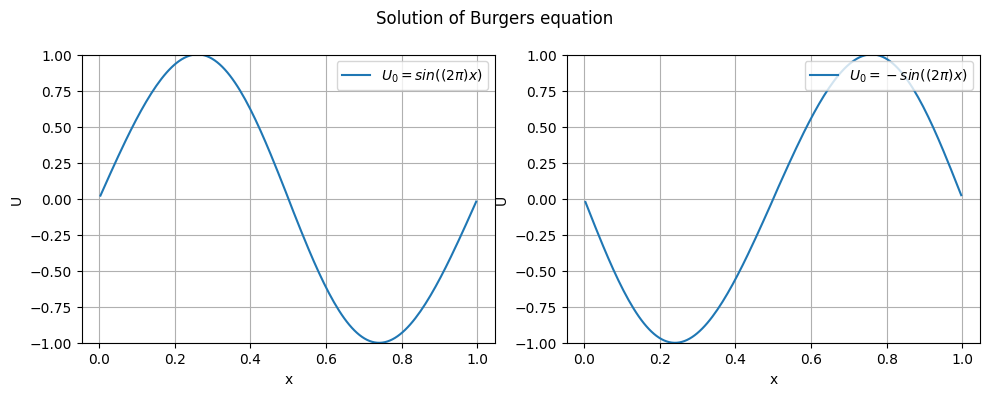

In [193]:
Data1 = np.loadtxt('BurgerSin.txt', delimiter=' ')
Data2 = np.loadtxt('Burger_Cos.txt', delimiter=' ')
fig, ax = plt.subplots(1,2, figsize = (10,4))

def anim(i):
    fig.tight_layout(w_pad=0, h_pad=3)
    ax.ravel()
    ax[0].clear()
    plt.suptitle('Solution of Burgers equation')
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('U')
    ax[0].grid('Major')
    ax[0].plot(xc, Data1[i*2], label = r'$U_{0} = sin((2\pi)x)$')
    ax[0].set_ylim(-1,1)
    ax[0].legend(loc='upper right')

    ax[1].clear()
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('U')
    ax[1].grid('Major')
    ax[1].plot(xc, Data2[i*2], label = r'$U_{0} = -sin((2\pi)x)$')
    ax[1].set_ylim(-1,1)
    ax[1].legend(loc='upper right')
a = FuncAnimation(fig, anim, frames = int(len(Data2)/2), interval = 200)
a.save('Anim.gif', writer='pillow', fps=150, dpi=100)